In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [3]:
def inswf(y, t, x1, k, k_, params):
    x1 = x1      
    k1, k2, k3, k4, k5, k6, k7, k8, k4d = k
    k_1, k_2, k_3, k_4, k_5, k_7, k_8, k_4d = k_
    ptp, irp = params
    
    x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = y
    
    dydt = np.empty(len(y))
      
    #x2
    dydt[0] = (k_1*x3 + k_3*ptp*x5 - k1*x1*x2 + k_4*x6 - k4*x2)
    #x3
    dydt[1] = (k1*x1*x2 - k_1*x3 - k3*x3)
    #x4
    dydt[2] = (k2*x1*x5 - k_2*x4 + k_4d*x7 - k4d*x4)
    #x5
    dydt[3] = (k3*x3 + k_2*x4 - k2*x1*x5 - k_3*ptp*x5 + k_4d*x8 - k4d*x5)
    #x6    
    dydt[4] = (k5 - k_5*x6 + k6*ptp*(x7 + x8) + k4*x2 - k_4*x6)   
    #x7
    dydt[5] = (k4d*x4 - k_4d*x7 - k6*ptp*x7)
    #x8
    dydt[6] = (k4d*x5 - k_4d*x8 - k6*ptp*x8)
    #x9
    dydt[7] = (k_7*ptp*x10 - k7*x9*(x4 + x5)/(irp))
    #x10
    dydt[8] = (k7*x9*(x4 + x5)/(irp) + k_8*x12 - (k_7*ptp + k8*x11)*x10)
    #x11
    dydt[9] = (k_8*x12 - k8*x10*x11)
    #x12
    dydt[10] = (k8*x10*x11 - k_8*x12)
    
    return dydt

In [21]:
params = np.array([[1, 8.97e-13],
                  [0.75, 8.97e-13],
                  [0.5, 8.97e-13],
                  [0.25, 8.97e-13]])

c_list = []

for i in params:
    
    #x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12
    yi = np.array([9e-13, #x2
                   0, #x3
                   0, #x4
                   0, #x5
                   1e-13, #x6
                   0, #x7
                   0, #x8
                   1e-12, #x9
                   0, #x10
                   1e-13, #x11
                   0  #x12
                  ])

    #k1, k2, k3, k4, k5, k6, k7, k8, k4d
    k = np.array([6e7, #k1
                  6e7, #k2
                  2500, #k3
                  (0.003/9), #k4
                  (10*1.67e-18), #k5
                  0.461, #k6
                  4.16, #k7 ####
                  ((10*5/70.775)*10**12), #k8
                  2.1e-3  #k4d
                 ])

    #k_1, k_2, k_3, k_4, k_5, k_7, k_8, k_4d
    k_ = np.array([0.2, #k_1
                   (100*0.2), #k_2
                   0.2, #k_3
                   0.003, #k_4
                   1.67e-18, #k_5
                   ((2.5/7.45)*4.16), #k_7
                   10, #k_8
                   2.1e-4 #k_4d
                  ])

    #Stimulate with maximal insulin (10e-7) for 15 mins
    t = np.linspace(0,15,900)
    x1 = np.array([10e-7])
    rtol, atol = np.array([1e-9,1e-9])
    
    params = i

    #Run odeint for 0 > 15mins
    y15 = odeint(inswf, yi, t, args = (x1, k, k_, params,), rtol = rtol, atol = atol, hmax = 0.001)
    
    t = np.linspace(0,45,2700)
    x1 = np.array([0])

    yi = y15[-1]
    y45 = odeint(inswf, yi, t, args = (x1, k, k_, params,), rtol = rtol, atol = atol, hmax = 0.001)

    #Concatenate y15 and y45 together
    y_cb = np.concatenate((y15,y45), axis = 0)
    
    c_list.append(y_cb)
    

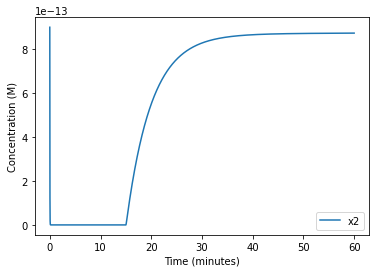

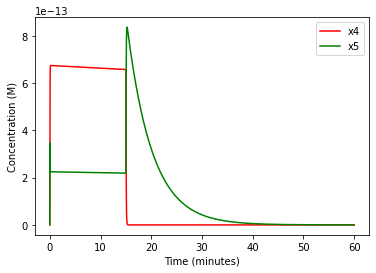

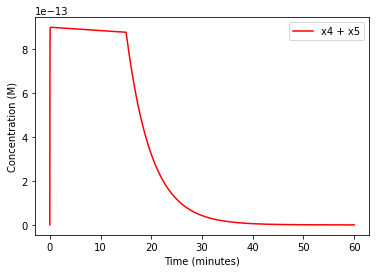

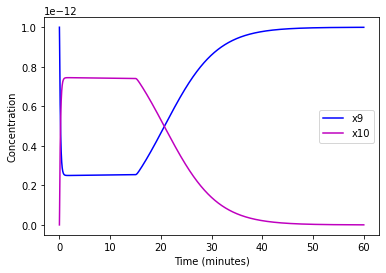

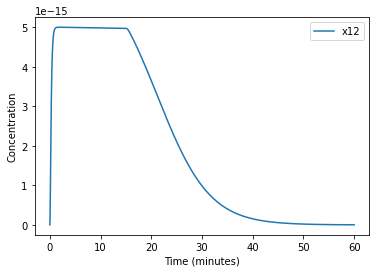

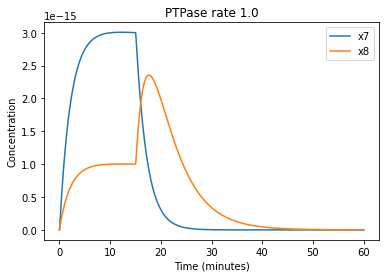

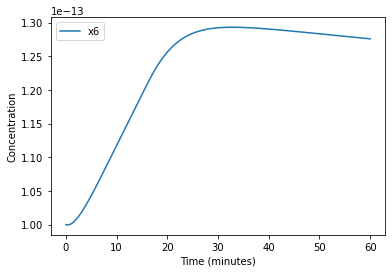

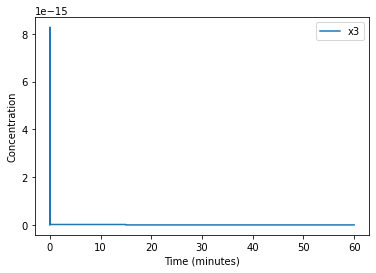

In [27]:
t = np.linspace(0,60,3600)

#x2
plt.figure()
plt.plot(t,c_list[0][:,0])
plt.ylabel("Concentration (M)")
plt.xlabel("Time (minutes)")
plt.legend(["x2"])
plt.show()

#x4 / x5
plt.figure()
plt.plot(t,c_list[0][:,2],"-r")
plt.plot(t,c_list[0][:,3],"-g")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (minutes)")
plt.legend(["x4","x5"])
plt.show()

#x4 + x5

plt.figure()
plt.plot(t,(c_list[0][:,2] + c_list[0][:,3]), "-r") #x4 + x5
plt.ylabel("Concentration (M)")
plt.xlabel("Time (minutes)")
plt.legend(["x4 + x5"])
plt.show()

#x9 / x10
plt.figure()
plt.plot(t,c_list[0][:,7],"-b") #x9
plt.plot(t,c_list[0][:,8],"-m") #x10
plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend(["x9","x10"])
plt.show()


#x12
plt.figure()
plt.plot(t,c_list[0][:,10])
plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend(["x12"])
plt.show()

##x7 / x8
plt.figure()
plt.plot(t,c_list[0][:,5])
plt.plot(t,c_list[0][:,6])
plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend(["x7","x8"])
plt.title("PTPase rate 1.0")
plt.show()

#x6
plt.figure()
plt.plot(t,c_list[0][:,4])
plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend(["x6"])
plt.show()

##x3
plt.figure()
plt.plot(t,c_list[0][:,1])
plt.ylabel("Concentration")
plt.xlabel("Time (minutes)")
plt.legend(["x3"])
plt.show()

In [6]:
ptp_range = ["1","0.75","0.5","0.25"]

#PI3K
ppi3k_t = []
for i in range(0,4):
    print(
        "pi3k", ptp_range[i],
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,10][950:]))) if x[1] <= 1e-20),
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,10][950:]))) if x[1] <= 1e-20)/60,
        np.mean(
            abs(
                np.diff(
                    c_list[i]
                    [:,10]
                    [(950+next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,10][950:]))) if x[1] <= 1e-20)):]))) < 1e-20
    )
    ppi3k_t.append(next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,10][950:]))) if x[1] <= 1e-20)/60)
    
print()

#pIRS1
pirs1_t = []
for i in range(0,4):
    print(
        "pirs1", ptp_range[i],
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,8][950:]))) if x[1] <= 1e-20),
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,8][950:]))) if x[1] <= 1e-20)/60,
        np.mean(
            abs(
                np.diff(
                    c_list[i]
                    [:,10]
                    [(950+next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,8][950:]))) if x[1] <= 1e-20)):]))) < 1e-20
    )
    pirs1_t.append(next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,8][950:]))) if x[1] <= 1e-20)/60)

print()
#IRS1
irs1_t = []
for i in range(0,4):
    print(
        "irs1", ptp_range[i],
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,7][950:]))) if x[1] <= 1e-20),
        next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,7][950:]))) if x[1] <= 1e-20)/60,
        np.mean(
            abs(
                np.diff(
                    c_list[i]
                    [:,10]
                    [(950+next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,7][950:]))) if x[1] <= 1e-20)):]))) < 1e-20
    )
    irs1_t.append(next(x[0] for x in enumerate(abs(np.diff(c_list[i][:,7][950:]))) if x[1] <= 1e-20)/60)
    
#pIR - doesn't reach ss / zero conc

pi3k 1 2630 43.833333333333336 True
pi3k 0.75 3510 58.5 True
pi3k 0.5 5254 87.56666666666666 True
pi3k 0.25 10362 172.7 True

pirs1 1 4095 68.25 True
pirs1 0.75 5458 90.96666666666667 True
pirs1 0.5 8160 136.0 True
pirs1 0.25 16065 267.75 True

irs1 1 4097 68.28333333333333 True
irs1 0.75 5461 91.01666666666667 True
irs1 0.5 8164 136.06666666666666 True
irs1 0.25 16073 267.8833333333333 True


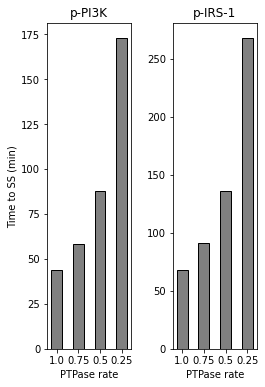

In [28]:
#Bar charts of time until approx zero

plt.figure(figsize = (6,6))
plt.subplots_adjust(wspace = .5,hspace = .5)

#pPI3K
plt.subplot(1,3,1)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = ppi3k_t, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.ylabel("Time to SS (min)")
plt.xlabel("PTPase rate")
plt.title("p-PI3K")

#pIRS1
plt.subplot(1,3,2)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = pirs1_t, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.xlabel("PTPase rate")
plt.title("p-IRS-1")

plt.show()

In [8]:
ppi3k_conc = []
ppi3k_conc.append(np.mean(c_list[0][:,10][200:400]))
ppi3k_conc.append(np.mean(c_list[1][:,10][200:400]))
ppi3k_conc.append(np.mean(c_list[2][:,10][200:400]))
ppi3k_conc.append(np.mean(c_list[3][:,10][200:400]))

In [9]:
pirs1_conc = []
pirs1_conc.append(np.mean(c_list[0][:,8][200:400]))
pirs1_conc.append(np.mean(c_list[1][:,8][200:400]))
pirs1_conc.append(np.mean(c_list[2][:,8][200:400]))
pirs1_conc.append(np.mean(c_list[3][:,8][200:400]))

In [10]:
irs1_conc = []
irs1_conc.append(np.mean(c_list[0][:,7][200:400]))
irs1_conc.append(np.mean(c_list[1][:,7][200:400]))
irs1_conc.append(np.mean(c_list[2][:,7][200:400]))
irs1_conc.append(np.mean(c_list[3][:,7][200:400]))

In [11]:
pir_conc = []
pir_conc.append(np.mean(c_list[0][:,2][200:400] + c_list[0][:,3][200:400]))
pir_conc.append(np.mean(c_list[1][:,2][200:400] + c_list[1][:,3][200:400]))
pir_conc.append(np.mean(c_list[2][:,2][200:400] + c_list[1][:,3][200:400]))
pir_conc.append(np.mean(c_list[3][:,2][200:400] + c_list[1][:,3][200:400]))

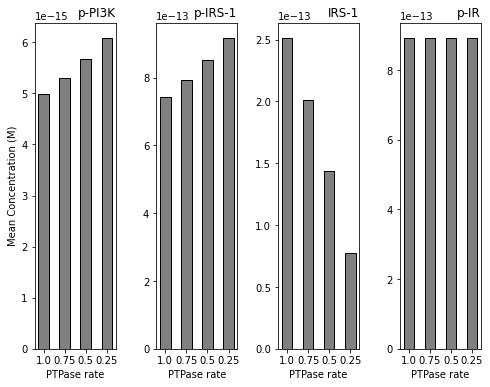

In [12]:
#Bar charts

plt.figure(figsize = (8,6))
plt.subplots_adjust(wspace = .5,hspace = .5)
#pPI3K
plt.subplot(1,4,1)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = ppi3k_conc, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.xlabel("PTPase rate")
plt.ylabel("Mean Concentration (M)")
plt.title("p-PI3K", loc = "right")

#pIRS-1
plt.subplot(1,4,2)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = pirs1_conc, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.xlabel("PTPase rate")
plt.title("p-IRS-1", loc = "right")

#IRS-1 unphos
plt.subplot(1,4,3)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = irs1_conc, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.xlabel("PTPase rate")
plt.title("IRS-1", loc = "right")

#pIR
plt.subplot(1,4,4)
plt.bar(x = ["1.0","0.75","0.5","0.25"],
       height = pir_conc, 
       width = 0.5,
       color = "grey",
       edgecolor = "black")
plt.xlabel("PTPase rate")
plt.title("p-IR", loc = "right")

plt.show()

In [13]:
#Percentages
#PI3K - PTP 1.0 to 0.25
print("ppi3k",
      ((ppi3k_conc[-1]/ppi3k_conc[0])*100))

#pIRS1
print("pirs1",
      ((pirs1_conc[-1]/pirs1_conc[0])*100))

#IRS1
print("irs1",
      ((irs1_conc[-1]/irs1_conc[0])*100))

#pIR
print("pir",
      ((pir_conc[-1]/pir_conc[0])*100))

ppi3k 121.80386403385613
pirs1 123.21936936562068
irs1 30.783719570597786
pir 100.05098941693007
